In [6]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn

In [7]:
ip = np.expand_dims(np.arange(-1.5, 1.5, 0.01),1)
op = (np.sin(5 * np.pi * ip))
x = torch.tensor(ip, dtype=torch.float32)
y = torch.tensor(op, dtype=torch.float32)

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear_1 = nn.Linear(1, 4)
        self.linear_2 = nn.Linear(4, 9)
        self.linear_3 = nn.Linear(9, 10)
        self.linear_4 = nn.Linear(10, 4)
        self.predict = nn.Linear(4, 1)
    
    def forward(self,x):
        x = nn.functional.leaky_relu(self.linear_1(x))
        x = nn.functional.leaky_relu(self.linear_2(x))
        x = nn.functional.leaky_relu(self.linear_3(x))
        x = nn.functional.leaky_relu(self.linear_4(x))
        x = self.predict(x)
        return x

In [10]:
def train_model(model, x, y):
    epoch_size = 4000
    losses_arr = []
    epochs_arr = []
    grad_arr = []
    converged = False
    
    lossm_val = float('inf')        # initialize
    minimal_ratio = 0.0             # initialize
    
    print('Beginning training')
    
    for epoch in range(epoch_size):
        if converged:
            return epoch_arr, loss_arr, y_prediction, grad_arr

        y_prediction = model(x)
        loss = loss_func(y_prediction, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())
        
        # Calculate gradient norm
        grad_all = 0.0
        for p in model.parameters():
            grad = 0.0
            if p.grad is not None:
                grad = (p.grad.cpu().data.numpy()**2).sum()
            grad_all += grad
        grad_norm = grad_all ** 0.5
        grad_arr.append(grad_norm)
        
        total_params = sum(p.numel() for p in model.parameters())
        if grad_norm < 0.001 or epoch == epoch_size - 1:
            print('Gradient norm reached minimum value')
            
            lossm = loss_func(model(x), y)
            
            H = torch.zeros((total_params, total_params))
            Jacob = torch.autograd.grad(lossm, list(model.parameters()), create_graph=True)
            Jacob = torch.cat([e.flatten() for e in Jacob])  # flatten
            
            for i in range(total_params):
                result = torch.autograd.grad(Jacob[i], list(model.parameters()), retain_graph=True)
                H[i] = torch.cat([r.flatten() for r in result])
            
            # Use torch.linalg.eigvalsh instead of deprecated symeig
            H_eig = torch.linalg.eigvalsh(H)
            positive_count = sum(i > 0 for i in H_eig.tolist())
            minimal_ratio = positive_count / H.shape[0]
            
            lossm_val = lossm.detach().numpy()
            print('Minimal Ratio:', minimal_ratio, ', Loss:', lossm_val, ', Epoch:', epoch)
            break
    
    print('Training Completed')
    return lossm_val, minimal_ratio

In [11]:
loss_arr = []
min_ratio_arr = []
for index in range(100):
    print("Training model ", index)
    model = Model()
    loss_func = torch.nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr = 1e-3, weight_decay = 1e-5)

    loss_value, min_ratio = train_model(model, x, y)
    loss_arr.append(loss_value)
    min_ratio_arr.append(min_ratio)

Training model  0
Beginning training
Gradient norm reached minimum value
Minimal Ratio: 0.594059405940594 , Loss: 0.21205236 , Epoch: 3999
Training Completed
Training model  1
Beginning training
Gradient norm reached minimum value
Minimal Ratio: 0.6287128712871287 , Loss: 0.17677234 , Epoch: 3999
Training Completed
Training model  2
Beginning training
Gradient norm reached minimum value
Minimal Ratio: 0.5099009900990099 , Loss: 0.49996594 , Epoch: 797
Training Completed
Training model  3
Beginning training
Gradient norm reached minimum value
Minimal Ratio: 0.594059405940594 , Loss: 0.09467691 , Epoch: 3999
Training Completed
Training model  4
Beginning training
Gradient norm reached minimum value
Minimal Ratio: 0.5792079207920792 , Loss: 0.27879867 , Epoch: 3999
Training Completed
Training model  5
Beginning training
Gradient norm reached minimum value
Minimal Ratio: 0.5099009900990099 , Loss: 0.4999815 , Epoch: 59
Training Completed
Training model  6
Beginning training
Gradient norm r

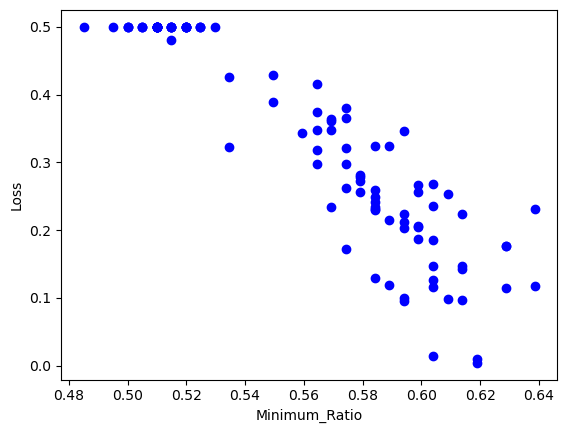

In [12]:
plt.scatter(min_ratio_arr,loss_arr, color = "blue")
plt.xlabel("Minimum_Ratio")
plt.ylabel("Loss")
plt.show()